In [1]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import cv2

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

click 'capture' to take photo

In [2]:
image_file = take_photo()

<IPython.core.display.Javascript object>

In [3]:
import imutils
from google.colab.patches import cv2_imshow

300 225


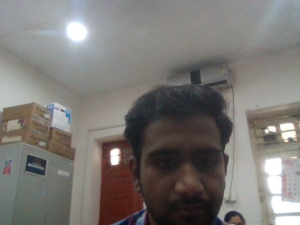

In [4]:
image = cv2.imread(image_file)
image = imutils.resize(image, width=300)
(h,w) =  image.shape[:2]
print(w,h)
cv2_imshow(image)

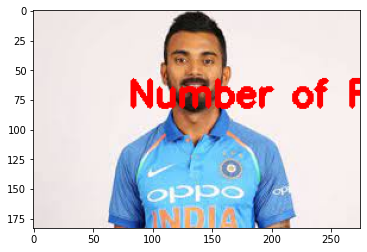

In [ ]:
import cv2
import matplotlib.pyplot as plt

def detectHC(imgpath):
    cascPath = "./haarcascades/haarcascade_frontalface_default.xml"
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    #faceCascade = cv2.CascadeClassifier(cascPath)


    font = cv2.FONT_HERSHEY_SIMPLEX

    frame = cv2.imread(imgpath)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(500, 500),
        flags=cv2.CASCADE_SCALE_IMAGE
    )

    # Draw a rectangle around the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 3)
        cv2.putText(frame,'Face',(x, y), font, 2,(255,0,0),5)

    cv2.putText(frame,'Number of Faces : ' + str(len(faces)),(40, 40), font, 1,(255,0,0),3)
    plt.imshow(frame)
    plt.show()
detectHC('/content/kl.jpg')

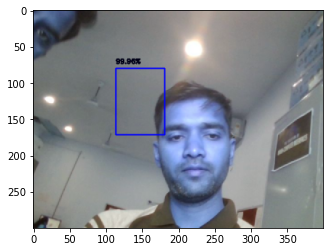

In [ ]:
plt.imsh(image)

In [5]:
#!wget -N https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt
#!wget -N https://raw.githubusercontent.com/opencv/opencv_3rdparty/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel

In [17]:
print("[INFO] loading model...")
import os
from os.path import dirname, join

prototxtPath = os.path.join(os.getcwd(), 'face_detector', 'deploy.prototxt')
weightsPath = os.path.join(os.getcwd(), 'face_detector', 'res10_300x300_ssd_iter_140000.caffemodel')

net = cv2.dnn.readNetFromCaffe(prototxt, model)

[INFO] loading model...


error: ignored

In [14]:
image = imutils.resize(image, width=400)
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300,300)), 1.0, (300,300),(104.0, 177.0, 123.0))


NameError: ignored

In [12]:
print("[INFO] computing object detections...")
net.setInput(blob)
detections = net.forward()

[INFO] computing object detections...


NameError: ignored

In [ ]:
import numpy as np
for i in range(0, detections.shape[2]):
  confidence = detections[0, 0, i, 2]
  if confidence>0.5:
    box = detections[0, 0, i, 3:7]*np.array([w, h, w, h])
    (startX, startY, endX, endY) = box.astype("int")
    text = "{:.2f}%".format(confidence*100)
    y = startY - 10 if startY - 10> 10 else startY + 10
    cv2.rectangle(image, (startX, startY), (endX, endY), (0, 0, 255), 2)
    cv2.putText(image, text, (startX, y),
                cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 22), 2)
  


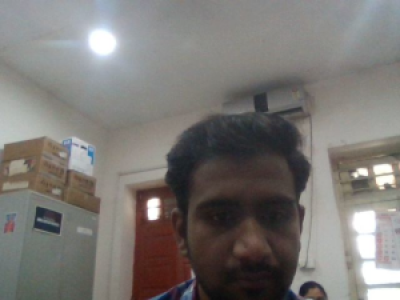

In [19]:
cv2_imshow(image)

In [18]:
import os
import cv2
import numpy as np
from PIL import Image

In [ ]:
recognizer = cv2.face.LBPHFaceRecognizer_create()
path='dataSet'